In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import csv
from skimage import exposure
import cv2

### Image Grid

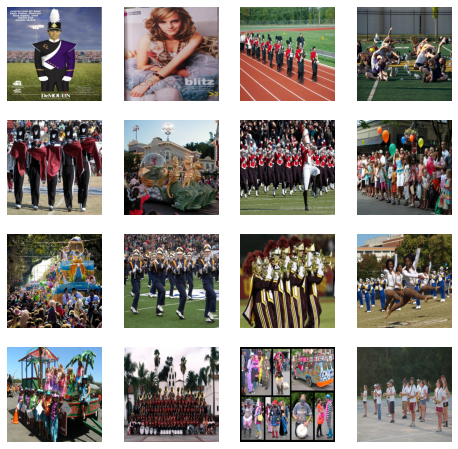

In [2]:
path = './ImageResources/Dataset/'

img_infos = {'labels':[],'images':[]}

with open(path+"wider_face_split/wider_face_train_bbx_gt.txt","r") as reader:
    counter = 0
    for line in reader:
        if(counter >= 16):
            break
        if(line == "" or len(line) < 3 or line[1] != "-" or line[2] != "-"):
            continue
            
        counter += 1
        
        img = cv2.imread(path+"WIDER_train/images/"+line[:-1]) 
        
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #cv2.normalize(img, img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        
        #img = exposure.equalize_hist(img)

        img = cv2.resize(img, (1080,1080) ,interpolation = cv2.INTER_AREA) #Resize the image to 32x32
        
        #cv2.imshow("",img) 
        #cv2.waitKey(0) 
        #cv2.destroyAllWindows()  
        
        img = np.array(img)

        img_infos['images'].append(img) #Save Image pixels
        #img_infos['labels'].append(row[-2]) #Save image Label
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 4
ax=[]

for i in range(columns*rows):    
    img = img_infos['images'][i]
    #label = img_infos['labels'][rand_index]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.imshow(img)

    plt.axis("off")
plt.show()


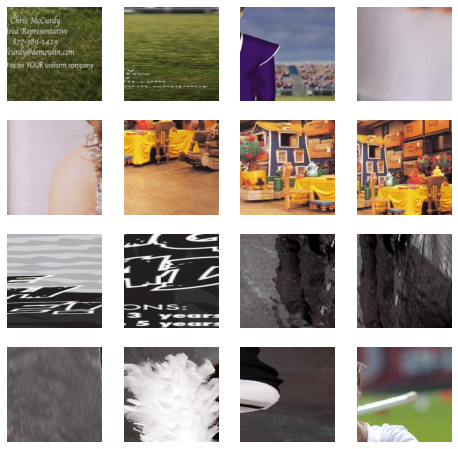

In [17]:
path = './ImageResources/Dataset/WIDER_train/cropped_images'

img_infos = {'labels':[],'images':[]}

with open(path+"/negative_info.txt","r") as reader:
    counter = 0
    for line in reader:
        if(counter >= 32):
            break
        
        counter += 1
        if(counter%2 == 0):
            continue
        
        line = line.split("/")[-1]
        
        img = cv2.imread(path+"/negative/"+line[:-1]) 

        
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #cv2.normalize(img, img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        
        #img = exposure.equalize_hist(img)

        img = cv2.resize(img, (1080,1080) ,interpolation = cv2.INTER_AREA) #Resize the image to 32x32
        
        #cv2.imshow("",img) 
        #cv2.waitKey(0) 
        #cv2.destroyAllWindows()  
        
        img = np.array(img)

        img_infos['images'].append(img) #Save Image pixels
        #img_infos['labels'].append(row[-2]) #Save image Label
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 4
ax=[]

for i in range(columns*rows):   
    img = img_infos['images'][i]
    #label = img_infos['labels'][rand_index]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.imshow(img)

    plt.axis("off")
plt.show()

### Images per Face Number Histograms

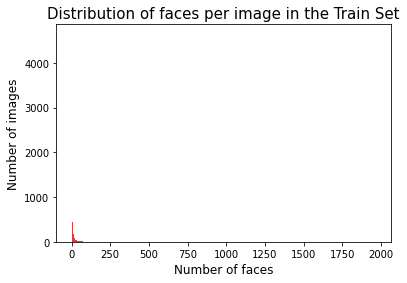

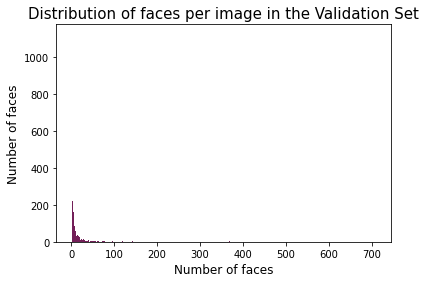

In [28]:
path = './Image Resources/Dataset/'


"""
train = []

with open(path+"wider_face_split/wider_face_train_bbx_gt.txt","r") as reader:
    for line in reader:
        if(line == "" or len(line) < 3 or line[2] != "-"):
            continue
        number = int(reader.readline()[:-1])
        found_number = next((item for item in train if item["number"] == number), None)
        if found_number is None:
            train.append({"number": number, "images": 1})
        else:
            found_number["images"] += 1
                     
train = sorted(train, key=lambda k: k['number']) 

val = []
with open(path+"wider_face_split/wider_face_val_bbx_gt.txt","r") as reader:
    for line in reader:
        if(line == "" or len(line) < 3 or line[2] != "-"):
            continue
        
        number = int(reader.readline().rstrip())
        found_number = next((item for item in val if item["number"] == number), None)
        if found_number is None:
            val.append({"number": number, "images": 1})
        else:
            found_number["images"] += 1
         
val = sorted(val, key=lambda k: k['number']) 

print(val)

print([val["number"] for val in train])
    
plt.bar([val["number"] for val in train], [img["images"] for img in train] , color="#e33641")
plt.xlabel('Number of faces',fontsize=12)
plt.ylabel('Number of images',fontsize=12)
plt.title('Distribution of faces per image in the Train Set',fontsize=15)

plt.show()

plt.bar([val["number"] for val in val], [img["images"] for img in val], color="#731f58")
plt.xlabel('Number of faces',fontsize=12)
plt.ylabel('Number of faces',fontsize=12)
plt.title('Distribution of faces per image in the Validation Set',fontsize=15)


plt.show()
"""
train = []
max_number_train = -1
counter = 0
with open(path+"wider_face_split/wider_face_train_bbx_gt.txt","r") as reader:
    for line in reader:
        if(line == "" or len(line) < 3 or line[2] != "-"):
            continue
        number = int(reader.readline()[:-1])
        if number > max_number_train:
            max_number_train = number
            
        if number == 1:
            counter += 1
            
        train.append(number)
                     
train = sorted(train) 

val = []
max_number_val = -1
with open(path+"wider_face_split/wider_face_val_bbx_gt.txt","r") as reader:
    for line in reader:
        if(line == "" or len(line) < 3 or line[2] != "-"):
            continue
        
        number = int(reader.readline().rstrip())
        if number > max_number_val:
            max_number_val = number
            
        val.append(number)
         
val = sorted(val) 
    
plt.hist(train, bins=max_number_train , color="#e33641")
plt.xlabel('Number of faces',fontsize=12)
plt.ylabel('Number of images',fontsize=12)
plt.title('Distribution of faces per image in the Train Set',fontsize=15)

plt.show()

plt.hist(val, bins=max_number_val ,  color="#731f58")
plt.xlabel('Number of faces',fontsize=12)
plt.ylabel('Number of faces',fontsize=12)
plt.title('Distribution of faces per image in the Validation Set',fontsize=15)


plt.show()

### Positive vs Negative Images

In [4]:
path = './Image Resources/Dataset/'


train_pos = 0
train_neg = 0
train_ones = 0
train_mult = 0
with open(path+"wider_face_split/wider_face_train_bbx_gt.txt","r") as reader:
    for line in reader:
        if(line == "" or len(line) < 3 or line[2] != "-"):
            continue
        
        number = int(reader.readline()[:-1])
        if number == 0:
            train_neg += 1
        else:
            train_pos += 1  
            if number == 1:
                train_ones += 1
            else:
                train_mult += 1
            
        

val_pos = 0
val_neg = 0
val_ones = 0
val_mult = 0
val_big = 0
with open(path+"wider_face_split/wider_face_val_bbx_gt.txt","r") as reader:
    for line in reader:
        if(line == "" or len(line) < 3 or line[2] != "-"):
            continue
        
        number = int(reader.readline()[:-1])
        if number == 0:
            val_neg += 1
        else:
            val_pos += 1  
            if number == 1:
                val_ones += 1
            else:
                val_mult += 1
                    
                    
print(val_big)
            
print("Test Pos:" + str(train_pos))
print("Test Ones:" + str(train_ones))
print("Test Mult:" + str(train_mult))
print("Test Neg:" + str(train_neg))
print()
print("Val Pos:" + str(val_pos))
print("Val Ones:" + str(val_ones))
print("Val Mult:" + str(val_mult))
print("Val Neg:" + str(val_neg))

1
Test Pos:12876
Test Ones:4631
Test Mult:8245
Test Neg:4

Val Pos:3226
Val Ones:1122
Val Mult:2104
Val Neg:0


## Line Graphs

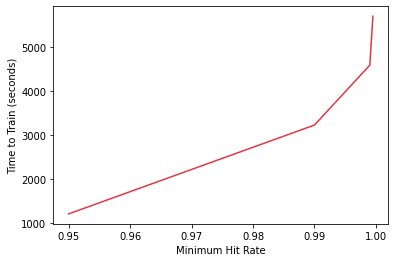

In [6]:

plt.plot([0.95, 0.99, 0.999, 0.9995], [1213, 3233, 4596, 5706], color="#e33641")
plt.xlabel('Minimum Hit Rate')
plt.ylabel('Time to Train (seconds)')
plt.show()